# Temporal segmentation of running section (issue)

Because the animals in the running section do not have the same speed across the laps, choosing a segmenting window in time results in laps with different traveled distances. For example below is the trajectoties of the animals in the running section segmented according to the time the animal took in the the fastest lap.

In [1]:
import neurolib as nl
import matplotlib.pyplot as plt
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Set the path to the database and find the BehavElectrData.mat MATLAB files for each animal available.

In [2]:
folder = '/media/bigdata/'
names = nl.find_files(folder)

/media/bigdata/i01_maze13.003/i01_maze13_MS.003_BehavElectrData.mat
/media/bigdata/i01_maze06.002/i01_maze06_MS.002_BehavElectrData.mat
/media/bigdata/i01_maze08.001/i01_maze08_MS.001_BehavElectrData.mat
/media/bigdata/i01_maze15.002/i01_maze15_MS.002_BehavElectrData.mat
/media/bigdata/i01_maze08.004/i01_maze08_MS.004_BehavElectrData.mat
/media/bigdata/i01_maze06.005/i01_maze06_MS.005_BehavElectrData.mat
/media/bigdata/i01_maze05.005/i01_maze05_MS.005_BehavElectrData.mat


Select one animal and show the trajectories in the running section and the activity of pyramidal cells.

In [68]:
animal = 6
cells, trajectory, duration = nl.get_cells(names[animal][1], only_pyr=True, section='Run')


82 cells extracted
/media/bigdata/i01_maze05.005/i01_maze05_MS.005_BehavElectrData.mat Loading completed


In [63]:
right_task = trajectory['right']
left_task = trajectory['left']
print '{} left and {} right alternations'.format(len(left_task), len(right_task))

6 left and 8 right alternations


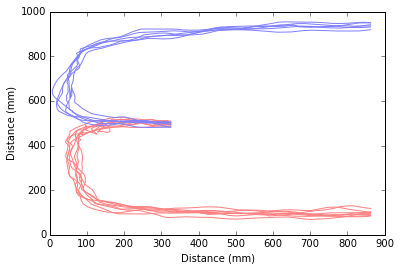

In [64]:
for ind, ri in enumerate(right_task):
    plt.plot(ri[0], ri[1], color=[1, 0.5, 0.5])

for ind, le in enumerate(left_task):
    plt.plot(le[0], le[1], color=[0.5, 0.5, 1.0])
plt.xlabel('Distance (mm)')
plt.ylabel('Distance (mm)')

Showing the lenght of each lap:

Fastest lap 9, at 2.3072 s


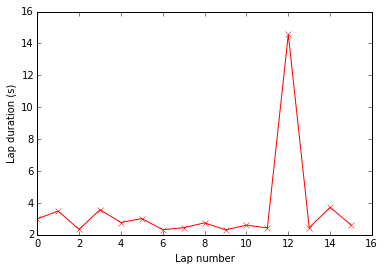

In [65]:
fs = 1250.
time_max = [x/fs for x in duration]
plt.plot(time_max, '-rx')
plt.xlabel('Lap number')
plt.ylabel('Lap duration (s)')
time_min = np.min(duration)
print 'Fastest lap {}, at {} s'.format(np.argmin(duration), time_min/fs)

Now, segementing all laps with the lenght of the fastest lap results in the following trajectories (end marked with an X in the figure below)

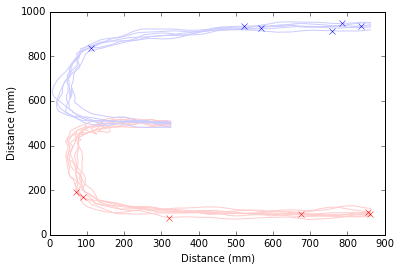

In [66]:
window = time_min - 1
#trasposing the list to have (Laps x Cells)
for ind, ri in enumerate(right_task):
    plt.plot(ri[0], ri[1], color=[1, 0.8, 0.8])
for ind, le in enumerate(left_task):
    plt.plot(le[0], le[1], color=[0.8, 0.8, 1.0])
    
for ri, le in zip(right_task, left_task):
    plt.plot(ri[0][window], ri[1][window], 'rx')
    plt.plot(le[0][window], le[1][window], 'bx')


plt.xlabel('Distance (mm)')
plt.ylabel('Distance (mm)')


In summary, segmenting in time has the issue of laps with different lenght because the animal does not run the section with uniform speed accross laps.